In [196]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [198]:
import pandas as pd

# Load the dataset with a different encoding
file_path = r"C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\Superstore.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [200]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [202]:
# Check data types
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [204]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [206]:

# Convert date columns to datetime if needed
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check the cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [208]:
# Group by 'Order Date' to understand daily sales trends
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Check total sales over time
print(daily_sales.head())



  Order Date     Sales
0 2014-01-03    16.448
1 2014-01-04   288.060
2 2014-01-05    19.536
3 2014-01-06  4407.100
4 2014-01-07    87.158


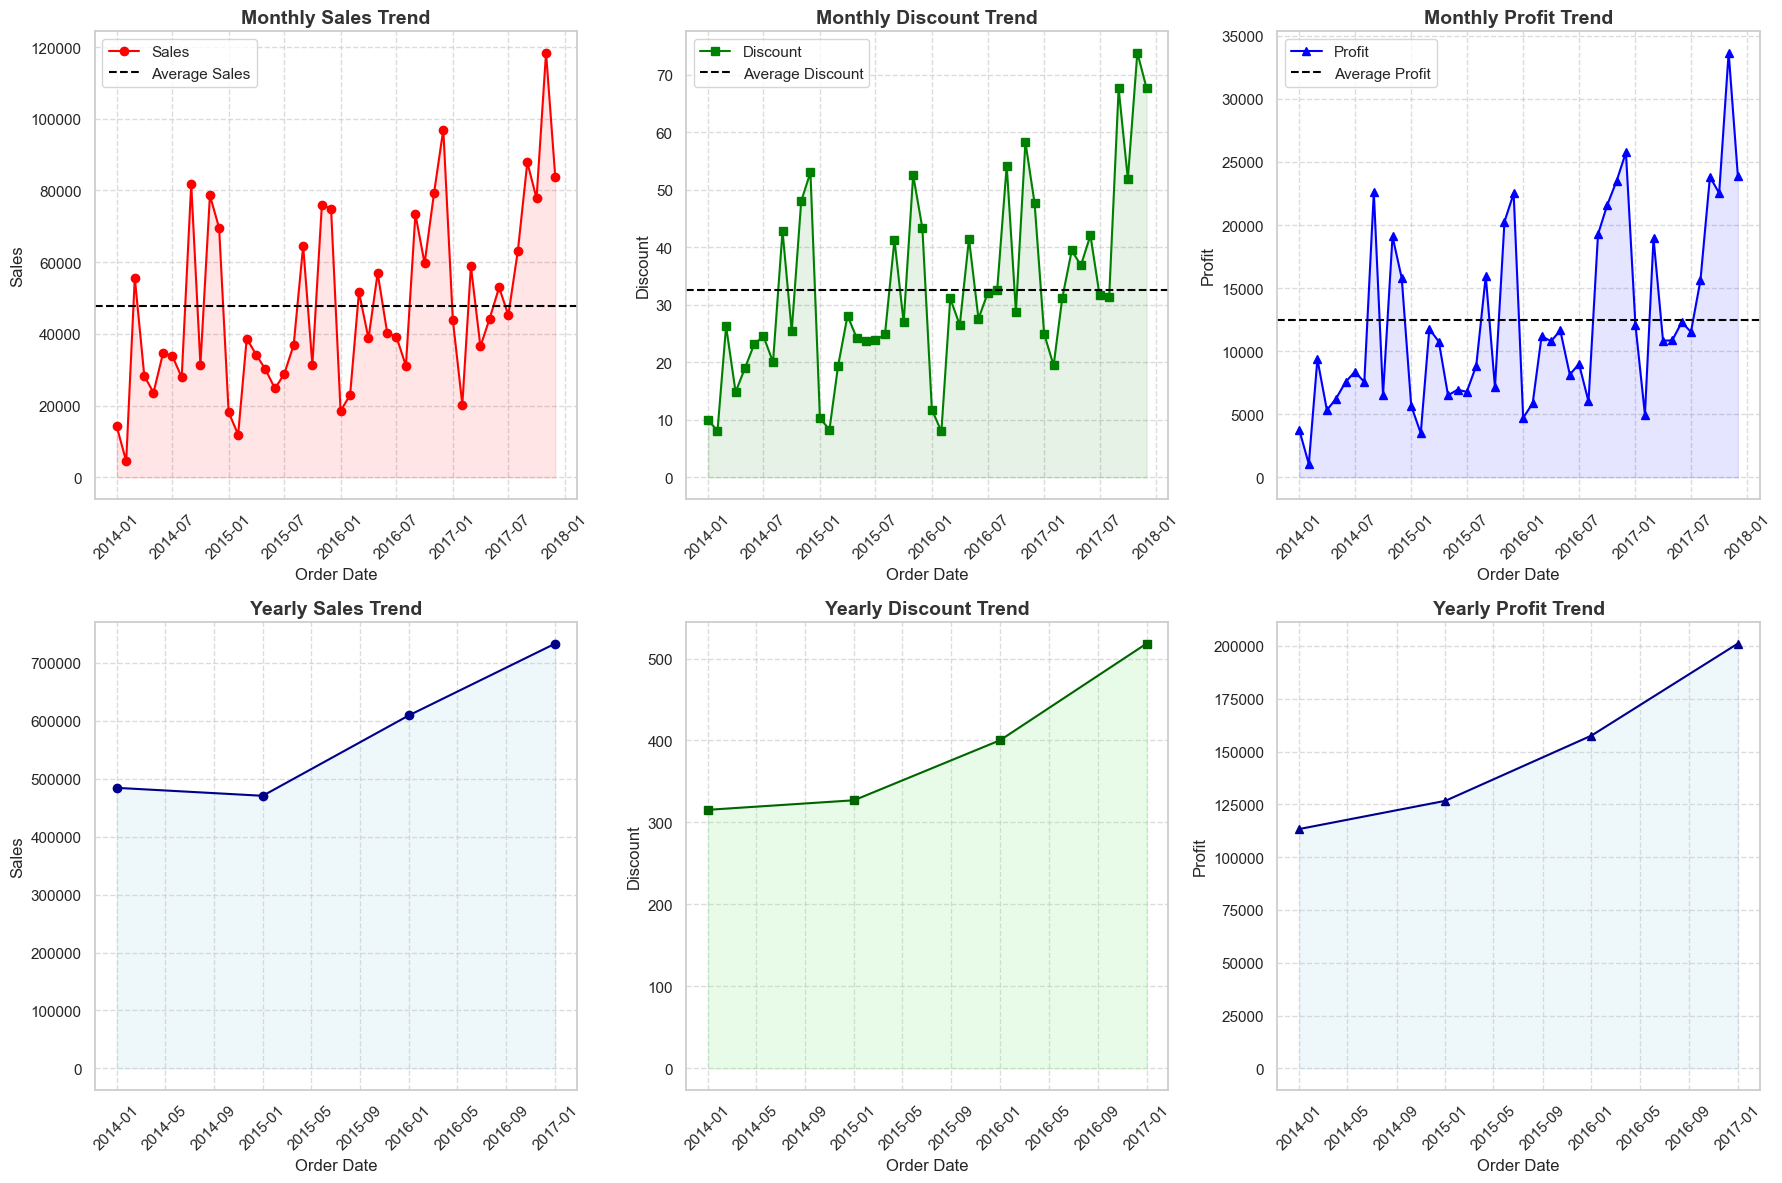

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern Seaborn style
sns.set(style="whitegrid")

# Create a figure with 2x3 subplots
plt.figure(figsize=(18, 12))

# Plot monthly sales with shaded areas, custom markers, and gradient color
plt.subplot(2, 3, 1)
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, marker='o', color='red', label='Sales')
plt.fill_between(monthly_sales.index.to_timestamp(), monthly_sales, color='red', alpha=0.1)
plt.axhline(y=avg_sales, color='black', linestyle='--', label='Average Sales', linewidth=1.5)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot monthly discount with custom marker and color gradient
plt.subplot(2, 3, 2)
plt.plot(monthly_discount.index.to_timestamp(), monthly_discount, marker='s', color='green', label='Discount')
plt.fill_between(monthly_discount.index.to_timestamp(), monthly_discount, color='green', alpha=0.1)
plt.axhline(y=avg_discount, color='black', linestyle='--', label='Average Discount', linewidth=1.5)
plt.title('Monthly Discount Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot monthly profit with a unique triangle marker and shaded area
plt.subplot(2, 3, 3)
plt.plot(monthly_profit.index.to_timestamp(), monthly_profit, marker='^', color='blue', label='Profit')
plt.fill_between(monthly_profit.index.to_timestamp(), monthly_profit, color='blue', alpha=0.1)
plt.axhline(y=avg_profit, color='black', linestyle='--', label='Average Profit', linewidth=1.5)
plt.title('Monthly Profit Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot yearly sales trend with color and marker customization
plt.subplot(2, 3, 4)
plt.plot(yearly_sales.index.to_timestamp(), yearly_sales, marker='o', color='darkblue', label='Sales')
plt.fill_between(yearly_sales.index.to_timestamp(), yearly_sales, color='lightblue', alpha=0.2)
plt.title('Yearly Sales Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot yearly discount trend with custom styling
plt.subplot(2, 3, 5)
plt.plot(yearly_discount.index.to_timestamp(), yearly_discount, marker='s', color='darkgreen', label='Discount')
plt.fill_between(yearly_discount.index.to_timestamp(), yearly_discount, color='lightgreen', alpha=0.2)
plt.title('Yearly Discount Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot yearly profit trend with unique markers
plt.subplot(2, 3, 6)
plt.plot(yearly_profit.index.to_timestamp(), yearly_profit, marker='^', color='darkblue', label='Profit')
plt.fill_between(yearly_profit.index.to_timestamp(), yearly_profit, color='lightblue', alpha=0.2)
plt.title('Yearly Profit Trend', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()


The data indicates a growing business with increasing sales, discounts, and profits over time. There seems to be a positive correlation between the higher discounts and increased sales, which has contributed to profit growth

In [65]:
# Assuming df is already defined and 'Order Date' is already converted to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for the years 2015, 2016, and 2017
df_2015_2017 = df[df['Order Date'].dt.year.isin([2015, 2016, 2017])]

# Aggregate data by month
monthly_data = df_2015_2017.groupby(df_2015_2017['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Discount': 'sum',
    'Profit': 'sum'
})

# Calculate the monthly averages for each metric
monthly_avg = monthly_data.groupby(monthly_data.index.year).mean()

# Extract the monthly averages for 2015, 2016, and 2017
avg_sales_2015 = monthly_avg.loc[2015, 'Sales']
avg_discount_2015 = monthly_avg.loc[2015, 'Discount']
avg_profit_2015 = monthly_avg.loc[2015, 'Profit']

avg_sales_2016 = monthly_avg.loc[2016, 'Sales']
avg_discount_2016 = monthly_avg.loc[2016, 'Discount']
avg_profit_2016 = monthly_avg.loc[2016, 'Profit']

avg_sales_2017 = monthly_avg.loc[2017, 'Sales']
avg_discount_2017 = monthly_avg.loc[2017, 'Discount']
avg_profit_2017 = monthly_avg.loc[2017, 'Profit']

# Print the results
print(f"Monthly Averages for 2015:")
print(f"Average Sales: {avg_sales_2015}")
print(f"Average Discount: {avg_discount_2015}")
print(f"Average Profit: {avg_profit_2015}")

print(f"\nMonthly Averages for 2016:")
print(f"Average Sales: {avg_sales_2016}")
print(f"Average Discount: {avg_discount_2016}")
print(f"Average Profit: {avg_profit_2016}")

print(f"\nMonthly Averages for 2017:")
print(f"Average Sales: {avg_sales_2017}")
print(f"Average Discount: {avg_discount_2017}")
print(f"Average Profit: {avg_profit_2017}")


Monthly Averages for 2015:
Average Sales: 39211.04241666667
Average Discount: 27.257500000000004
Average Profit: 10556.448791666668

Monthly Averages for 2016:
Average Sales: 50767.13316666667
Average Discount: 33.36
Average Profit: 13128.419475

Monthly Averages for 2017:
Average Sales: 61101.27126666667
Average Discount: 43.185
Average Profit: 16759.304699999997


C:\Users\divaa\AppData\Local\Temp\ipykernel_12432\2471512344.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(color_map)(np.linspace(0.2, 0.8, len(values)))
C:\Users\divaa\AppData\Local\Temp\ipykernel_12432\2471512344.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(color_map)(np.linspace(0.2, 0.8, len(values)))
C:\Users\divaa\AppData\Local\Temp\ipykernel_12432\2471512344.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()``

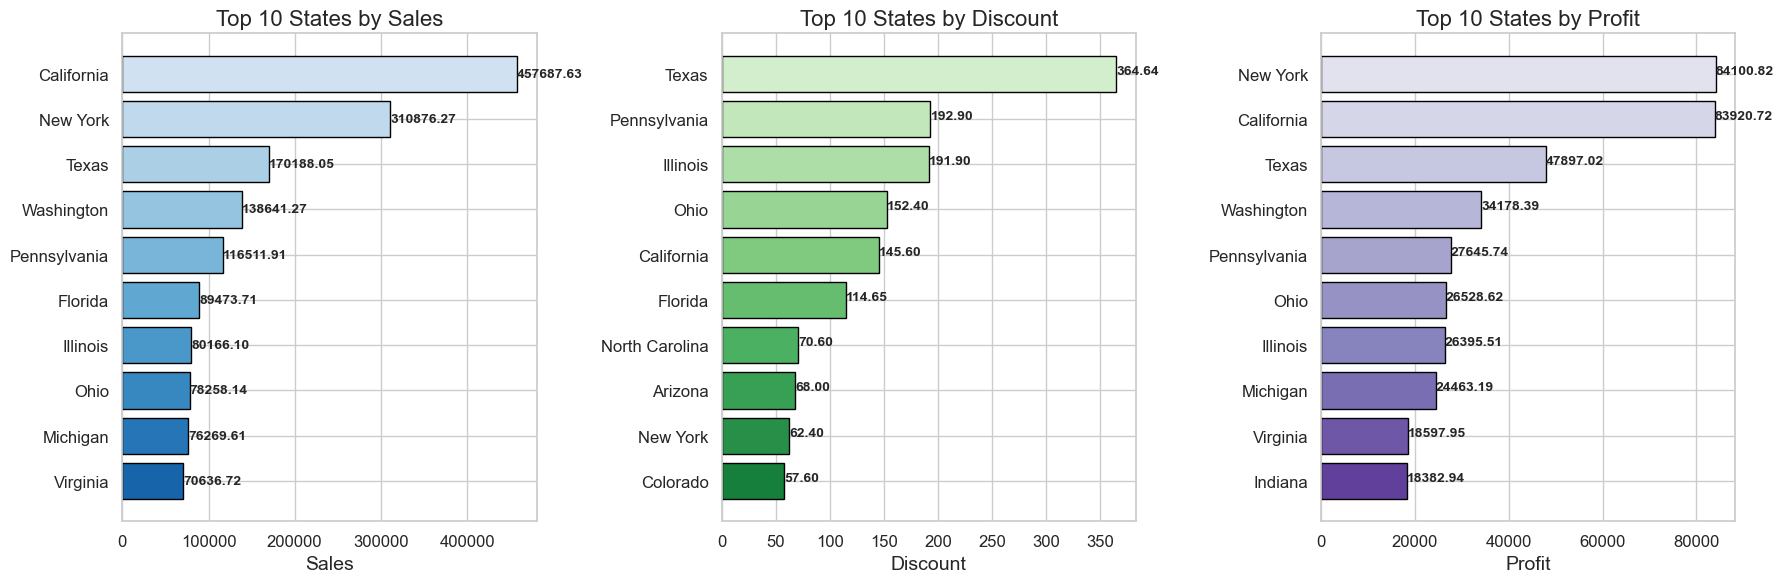

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming `top_states_sales`, `top_states_discount`, and `top_states_profit` are already defined as in the given code

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Function to add a gradient color
def gradient_barh(ax, values, color_map):
    colors = cm.get_cmap(color_map)(np.linspace(0.2, 0.8, len(values)))
    for idx, (value, color) in enumerate(zip(values, colors)):
        ax.barh(idx, value, color=color, edgecolor='black', linewidth=1)

# Plot for Sales with gradient
gradient_barh(axes[0], top_states_sales['Sales'], 'Blues')
axes[0].set_yticks(range(len(top_states_sales['State'])))
axes[0].set_yticklabels(top_states_sales['State'])
axes[0].set_title('Top 10 States by Sales', fontsize=16)
axes[0].set_xlabel('Sales', fontsize=14)
axes[0].invert_yaxis()
axes[0].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_states_sales['Sales']):
    axes[0].text(v, i, f'{v:.2f}', va='center', ha='left', fontsize='10', fontweight='bold')

# Plot for Discount with gradient
gradient_barh(axes[1], top_states_discount['Discount'], 'Greens')
axes[1].set_yticks(range(len(top_states_discount['State'])))
axes[1].set_yticklabels(top_states_discount['State'])
axes[1].set_title('Top 10 States by Discount', fontsize=16)
axes[1].set_xlabel('Discount', fontsize=14)
axes[1].invert_yaxis()
axes[1].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_states_discount['Discount']):
    axes[1].text(v, i, f'{v:.2f}', ha='left', fontsize='10', fontweight='bold')

# Plot for Profit with gradient
gradient_barh(axes[2], top_states_profit['Profit'], 'Purples')
axes[2].set_yticks(range(len(top_states_profit['State'])))
axes[2].set_yticklabels(top_states_profit['State'])
axes[2].set_title('Top 10 States by Profit', fontsize=16)
axes[2].set_xlabel('Profit', fontsize=14)
axes[2].invert_yaxis()
axes[2].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_states_profit['Profit']):
    axes[2].text(v, i, f'{v:.2f}', ha='left', fontsize='10', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Display the plots 
plt.show()


California and New York emerge as the top-performing states in both sales and profit, suggesting strong market demand and effective profitability management.
Texas is notable for both high discounts and high profits, indicating that the discount strategy may be effective in generating enough sales volume to sustain profitability

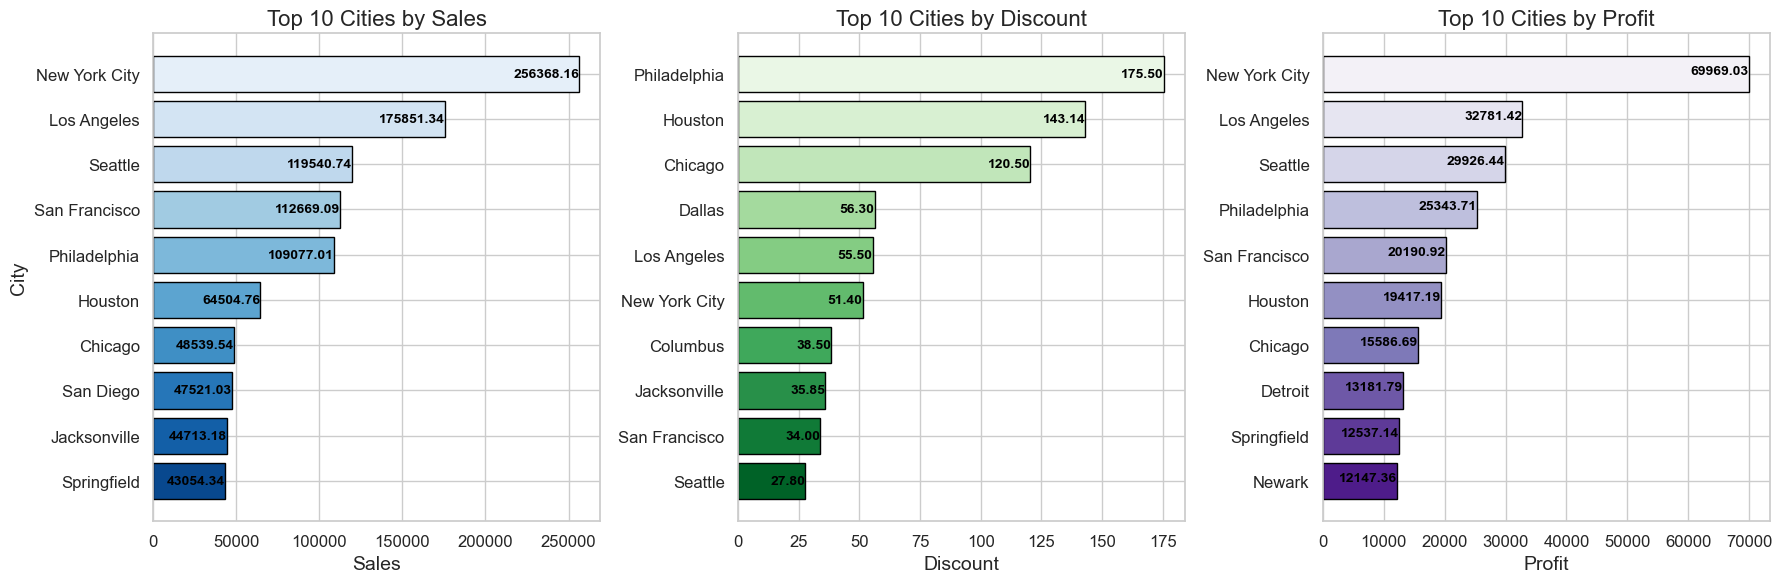

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Get the top 10 cities by sales, discount, and profit
top_city_sales = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()
top_city_discount = df.groupby('City')['Discount'].sum().nlargest(10).reset_index()
top_city_profit = df.groupby('City')['Profit'].sum().nlargest(10).reset_index()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Define color gradients for each metric
sales_colors = sns.color_palette("Blues", len(top_city_sales))
discount_colors = sns.color_palette("Greens", len(top_city_discount))
profit_colors = sns.color_palette("Purples", len(top_city_profit))

# Plot for Sales with gradient colors
axes[0].barh(top_city_sales['City'], top_city_sales['Sales'], color=sales_colors, edgecolor='black', linewidth=1)
axes[0].set_title('Top 10 Cities by Sales', fontsize=16)
axes[0].set_xlabel('Sales', fontsize=14)
axes[0].set_ylabel('City', fontsize=14)
axes[0].invert_yaxis()
axes[0].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_sales['Sales']):
    axes[0].text(v, i, f'{v:.2f}', va='center', ha='right', fontsize=10, color='black', fontweight='bold')

# Plot for Discount with gradient colors
axes[1].barh(top_city_discount['City'], top_city_discount['Discount'], color=discount_colors, edgecolor='black', linewidth=1)
axes[1].set_title('Top 10 Cities by Discount', fontsize=16)
axes[1].set_xlabel('Discount', fontsize=14)
axes[1].invert_yaxis()
axes[1].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_discount['Discount']):
    axes[1].text(v, i, f'{v:.2f}', va='center', ha='right', fontsize=10, color='black', fontweight='bold')

# Plot for Profit with gradient colors
axes[2].barh(top_city_profit['City'], top_city_profit['Profit'], color=profit_colors, edgecolor='black', linewidth=1)
axes[2].set_title('Top 10 Cities by Profit', fontsize=16)
axes[2].set_xlabel('Profit', fontsize=14)
axes[2].invert_yaxis()
axes[2].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_profit['Profit']):
    axes[2].text(v, i, f'{v:.2f}', ha='right', fontsize=10, color='black', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


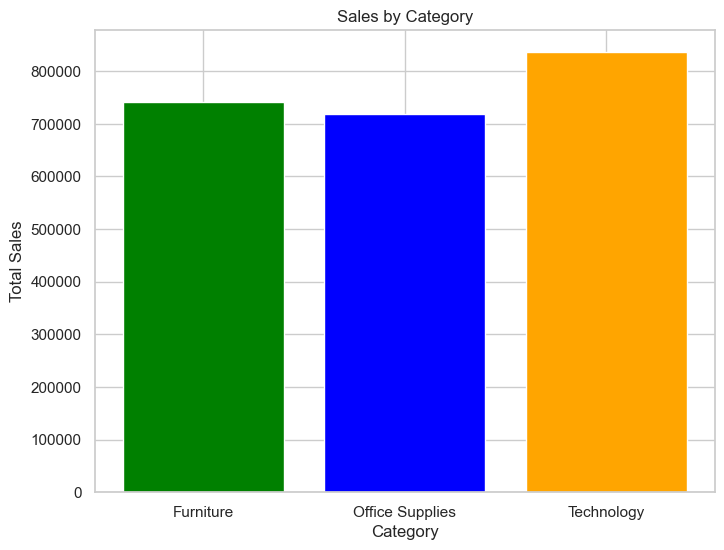

In [30]:
# Group by product category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Plot category-wise sales
plt.figure(figsize=(8, 6))
plt.bar(category_sales['Category'], category_sales['Sales'], color=['green', 'blue', 'orange'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


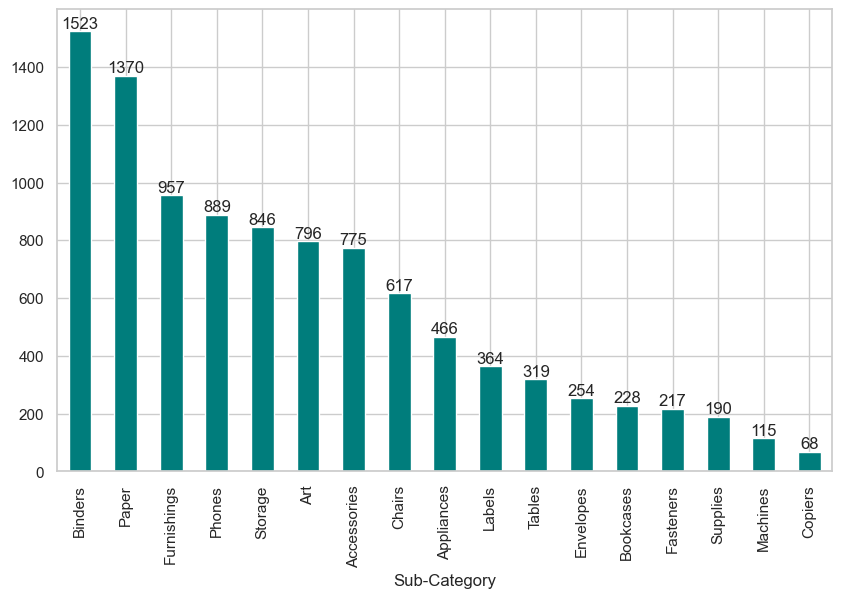

In [80]:
plt.figure(figsize=(10,6))
df['Sub-Category'].value_counts().plot(kind='bar', color='#007d7c')
# print values on the bars
for i, v in enumerate(df['Sub-Category'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# show the plot
plt.show()

Average of Ship Mode

<Axes: ylabel='count'>

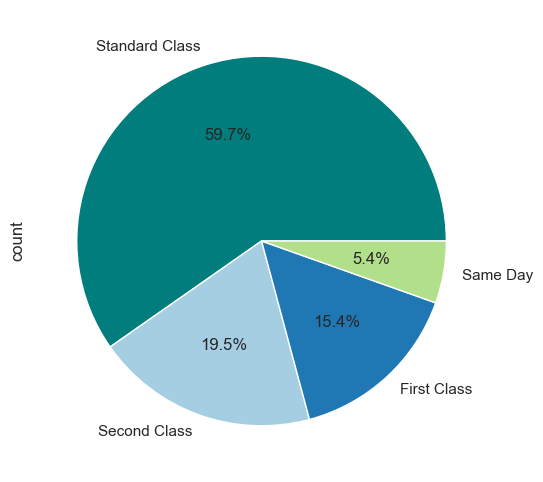

In [89]:

plt.figure(figsize=(10, 6))
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#007d7c', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c'])   


In [91]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

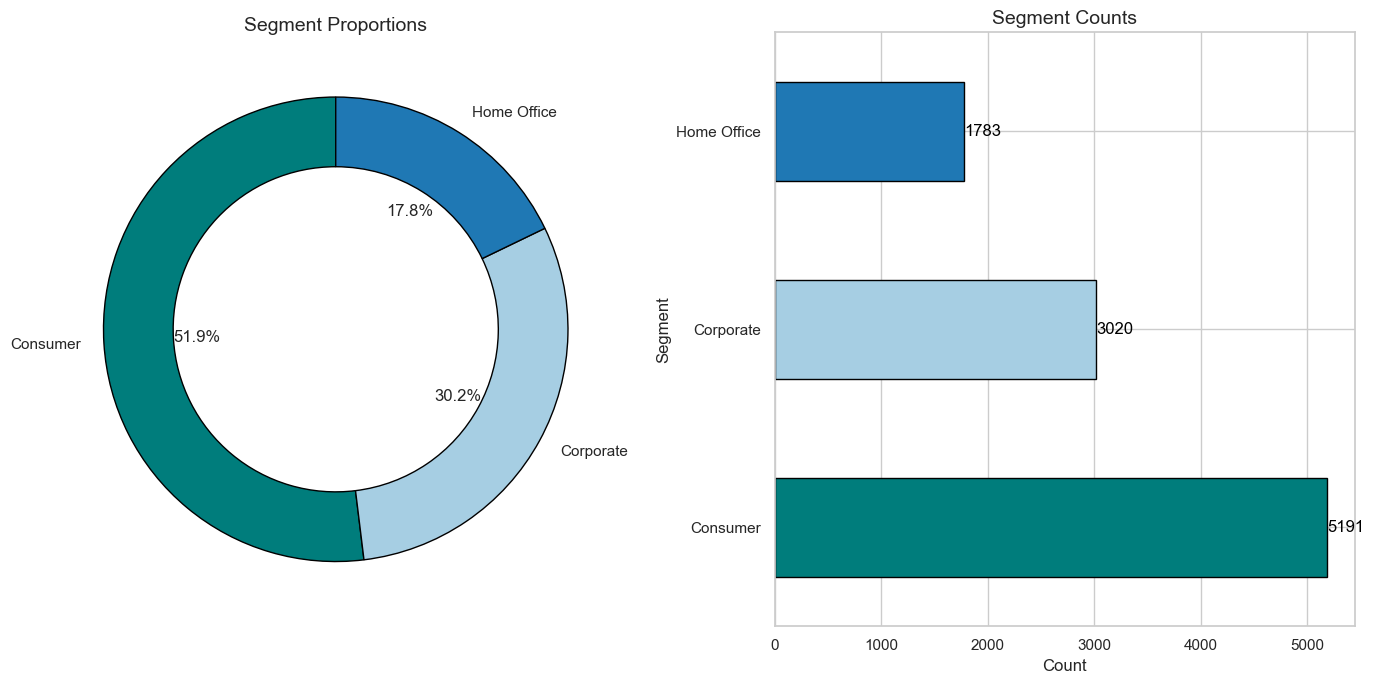

In [105]:
import matplotlib.pyplot as plt

# Example dataset (replace with your df)
# df = your_dataframe

plt.figure(figsize=(14, 7))

# Donut Chart for Segment Proportions
plt.subplot(1, 2, 1)
plt.title('Segment Proportions', fontsize=14)
sizes = df['Segment'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, 
        colors=['#007d7c', '#a6cee3', '#1f78b4'], wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Horizontal Bar Chart for Segment Counts
plt.subplot(1, 2, 2)
df['Segment'].value_counts().plot(kind='barh', color=['#007d7c', '#a6cee3', '#1f78b4'], edgecolor='black')

# Adding labels and title
plt.title('Segment Counts', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Segment', fontsize=12)

# Display values on the bars
for i, v in enumerate(df['Segment'].value_counts()):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Words Cloud of Product Names

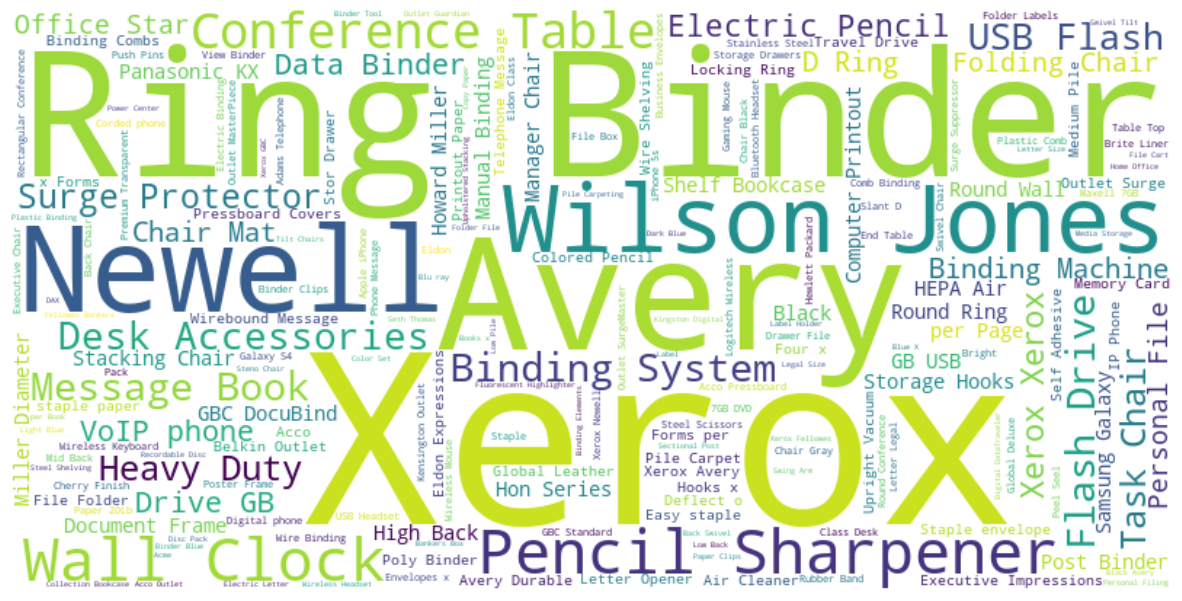

In [112]:
# world cloud of Product Names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Product Name']))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

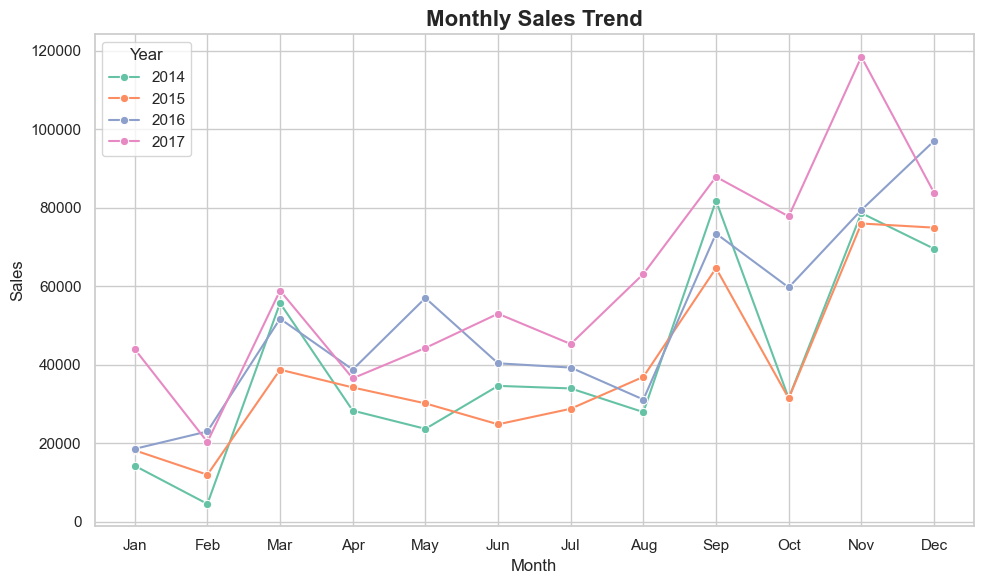

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'Order Year' and 'Order Month'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Group by 'Order Year' and 'Order Month' and sum the sales and profit
group_by_year_month = df.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()

# Function to create the monthly line plot
def lineplot_monthly(data, parameter, hue=None, palette=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Order Month', y=parameter, hue=hue, marker='o', palette=palette)
    plt.title(f'Monthly {parameter} Trend', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(parameter, fontsize=12)
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if hue:
        plt.legend(title='Year', loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the monthly sales trend with year as the hue
lineplot_monthly(group_by_year_month, 'Sales', hue='Order Year', palette='Set2')


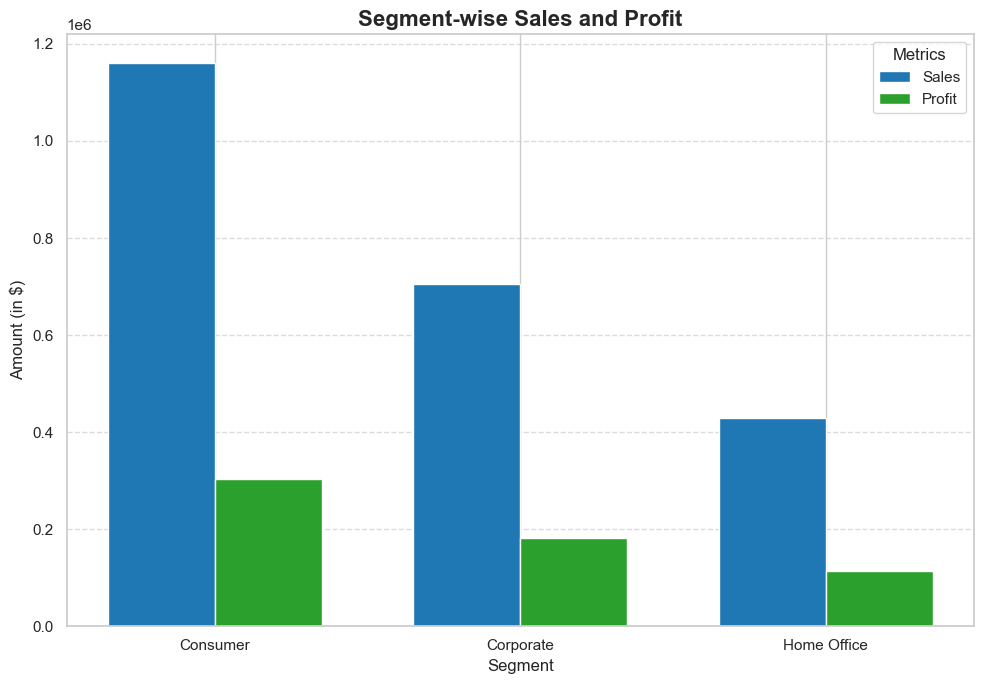

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'Segment' and aggregate Sales and Profit
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Set classic color scheme
sales_color = '#1f77b4'  # Classic blue for Sales
profit_color = '#2ca02c'  # Classic green for Profit

# Create a figure for the bar chart
plt.figure(figsize=(10, 7))

# Define the width for the bars and positions
bar_width = 0.35
segments = np.arange(len(segment_sales_profit))

# Plot Sales bars
plt.bar(segments - bar_width/2, segment_sales_profit['Sales'], width=bar_width, color=sales_color, label='Sales')

# Plot Profit bars
plt.bar(segments + bar_width/2, segment_sales_profit['Profit'], width=bar_width, color=profit_color, label='Profit')

# Add labels, title, and ticks
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Amount (in $)', fontsize=12)
plt.title('Segment-wise Sales and Profit', fontsize=16, fontweight='bold')
plt.xticks(segments, segment_sales_profit['Segment'])

# Add legend
plt.legend(title='Metrics', loc='best')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



In [149]:
# Group the data by 'Segment' and aggregate Sales and Profit
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Calculate profit margin for each segment
segment_sales_profit['Profit Margin (%)'] = (segment_sales_profit['Profit'] / segment_sales_profit['Sales']) * 100

# Display the result
segment_sales_profit[['Segment', 'Sales', 'Profit', 'Profit Margin (%)']]


,Segment,Sales,Profit,Profit Margin (%)
0,Consumer,1.161401e+06,304010.6316,26.176191
1,Corporate,7.061464e+05,181553.5492,25.710470
2,Home Office,4.296531e+05,113095.4123,26.322491


Profit is the actual amount earned after costs.
Profit margin is a percentage that shows how efficiently a company is turning sales into profit.

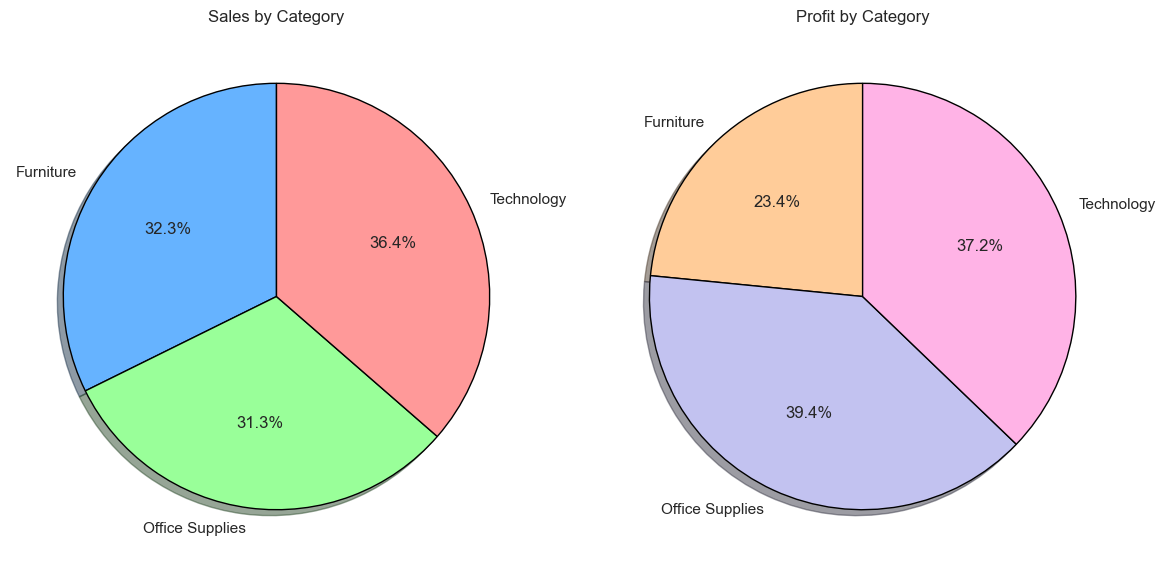

In [158]:
import matplotlib.pyplot as plt

# Grouping Sales and Profit by Category
sales_profit_by_category = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Creating subplots for Sales and Profit
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Sales by Category
ax[0].pie(sales_profit_by_category['Sales'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%', 
          startangle=90, colors=['#66b3ff', '#99ff99', '#ff9999'], shadow=True, wedgeprops={'edgecolor': 'black'})
ax[0].title.set_text('Sales by Category')

# Pie chart for Profit by Category
ax[1].pie(sales_profit_by_category['Profit'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%', 
          startangle=90, colors=['#ffcc99', '#c2c2f0', '#ffb3e6'], shadow=True, wedgeprops={'edgecolor': 'black'})
ax[1].title.set_text('Profit by Category')

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.tight_layout()
plt.show()


"Office Supplies" generate the highest profit, accounting for 50.2% of total profits, despite having a similar sales percentage to Furniture and Technology. "Furniture", while having almost similar sales percentage (even the highest), contributes to only 8.3% of total profits, indicating lower profit margins compared to the other categories

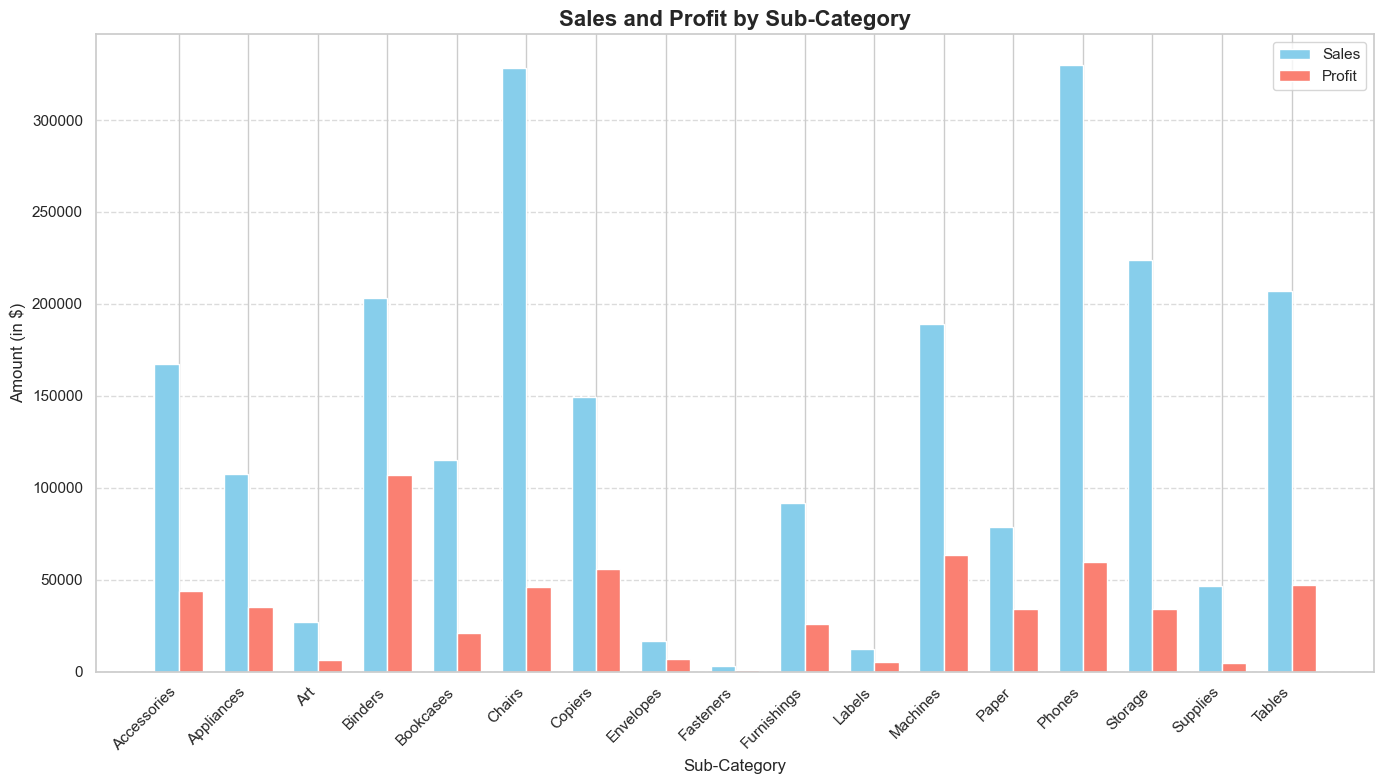

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Sub-Category' and aggregate Sales and Profit
sub_category_sales_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

# Set the figure size and Seaborn style for better aesthetics
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot for Sales and Profit by Sub-Category
bar_width = 0.35  # Width of the bars

# Create the positions for the bars on the x-axis
r1 = range(len(sub_category_sales_profit))
r2 = [x + bar_width for x in r1]

# Plot Sales bars
plt.bar(r1, sub_category_sales_profit['Sales'], color='skyblue', width=bar_width, label='Sales')

# Plot Profit bars next to Sales bars
plt.bar(r2, sub_category_sales_profit['Profit'], color='salmon', width=bar_width, label='Profit')

# Add x-axis labels and customize the appearance
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Amount (in $)', fontsize=12)
plt.title('Sales and Profit by Sub-Category', fontsize=16, fontweight='bold')

# Add the x-tick labels (Sub-Category names) and rotate them for readability
plt.xticks([r + bar_width / 2 for r in range(len(sub_category_sales_profit))], sub_category_sales_profit['Sub-Category'], rotation=45, ha='right')

# Add legend
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


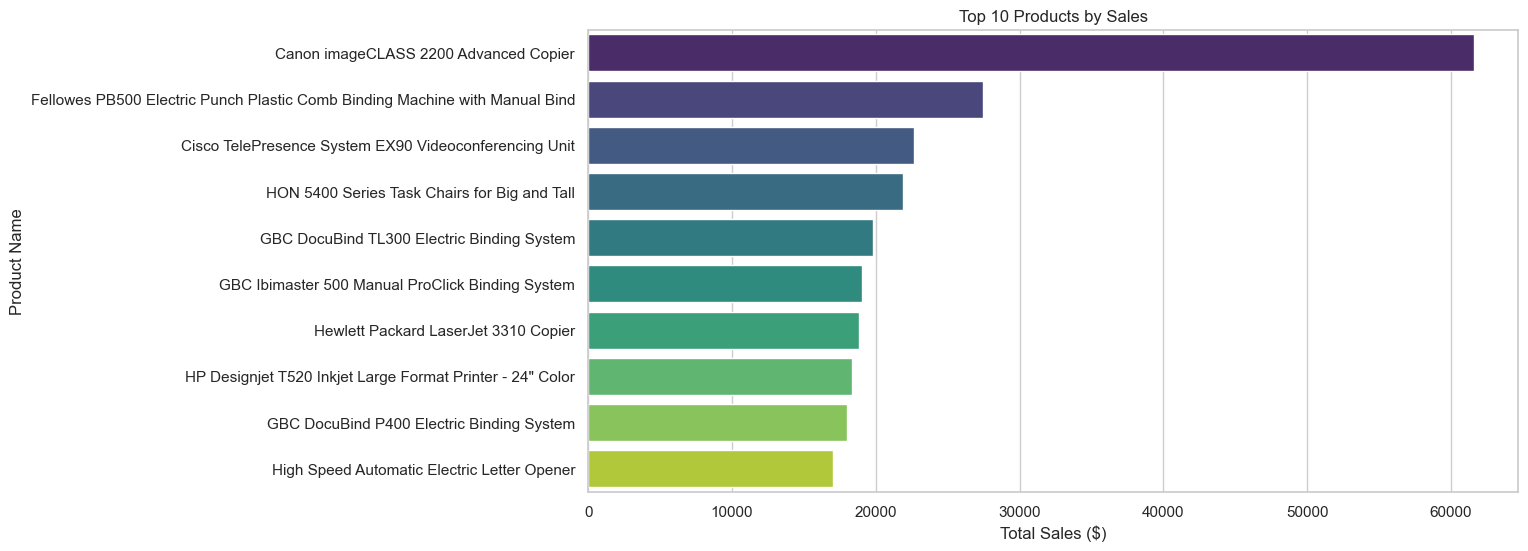

In [165]:
# 1. Demand by Product (Top Products by Sales)
top_products = df.groupby('Product Name')[['Sales', 'Quantity']].sum().reset_index()
top_products_sorted = top_products.sort_values(by='Sales', ascending=False)

# Plotting Top Products by Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=top_products_sorted.head(10), palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.show()

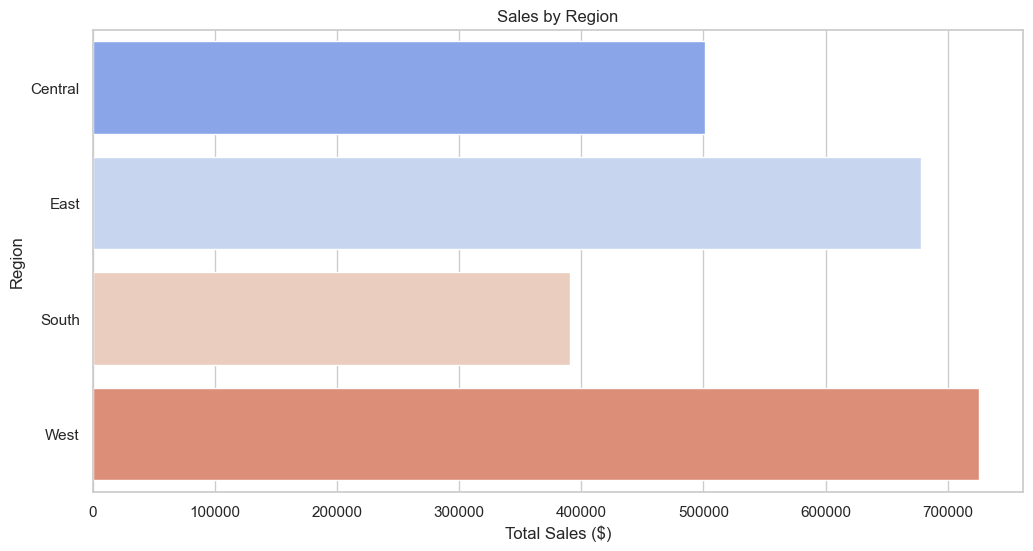

In [177]:
# Check if the 'Region' column exists and calculate Sales by Region
if 'Region' in df.columns:
    sales_by_region = df.groupby('Region')[['Sales']].sum().reset_index()

    # Plotting Sales by Region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Sales', y='Region', data=sales_by_region, palette='coolwarm')
    plt.title('Sales by Region')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('Region')
    plt.show()
else:
    print("Region data is not available in the dataset.")


Price Elasticity of Demand (PED) Analysis

In [185]:
# Calculate Price as Sales/Quantity, and percentage change in Price and Quantity
df['Price'] = df['Sales'] / df['Quantity']  # Price per unit

# Drop rows where Sales or Quantity are zero or missing
df = df[(df['Quantity'] > 0) & (df['Sales'] > 0)]

# Calculate the percentage change in Price and Quantity
df['Price Change'] = df['Price'].pct_change() * 100  # Percent change in Price
df['Quantity Change'] = df['Quantity'].pct_change() * 100  # Percent change in Quantity

# Check for rows where price change or quantity change is extremely small or NaN
df = df[(df['Price Change'].abs() > 0.01) & (df['Quantity Change'].abs() > 0.01)]

# Remove rows with NaN values in 'Price Change' or 'Quantity Change'
df = df.dropna(subset=['Price Change', 'Quantity Change'])

# Calculate Elasticity as the ratio of percentage change in quantity to percentage change in price
df['Elasticity'] = df['Quantity Change'] / df['Price Change']

# Remove rows with NaN elasticity
df = df.dropna(subset=['Elasticity'])

# Check if there is enough data to calculate the average elasticity
if not df.empty:
    # Calculate the average elasticity
    average_elasticity = df['Elasticity'].mean()
    print(f'Average Price Elasticity of Demand: {average_elasticity:.2f}')
else:
    print("Not enough data to calculate elasticity.")


Average Price Elasticity of Demand: -1.75


 an elasticity of -1.75 means that the product is quite sensitive to price changes, and small price reductions could lead to significant increases in demand. Conversely, price increases will likely lead to larger drops in sales.